## 출처:
https://medium.com/towards-data-science/top-machine-learning-algorithms-for-classification-2197870ff501m

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [4]:
os.listdir()

['.ipynb_checkpoints',
 'heart-disease-cleveland-uci.zip',
 'heart_disease',
 'Heart_Disease.ipynb',
 'Machine Learning Algorithms for Classification.ipynb',
 'matplotlib.ipynb']

In [5]:
import shutil 

filename = "heart-disease-cleveland-uci.zip"
extrac_dir = "heart_disease"
archive_format ="zip"

shutil.unpack_archive(filename, extrac_dir, archive_format)

In [6]:
os.listdir("heart_disease")
        

['heart_cleveland_upload.csv']

In [7]:
for file in os.listdir("heart_disease"):
    with open(os.path.join("heart_disease", 'heart_cleveland_upload.csv'),"r") as f:
        text = f.read()
        print(text)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
59,1,0,178,270,0,2,145,0,4.2,2,0,2,0
59,1,0,170,288,0,2,159,0,0.2,1,0,2,1
59,1,0,160,273,0,2,125,0,0,0,0,0,1
59,1,0,134,204,0,0,162,0,0.8,0,2,0,1
58,0,0,150,283,1,2,162,0,1,0,0,0,0
56,1,0,120,193,0,2,162,0,1.9,1,0,2,0
52,1,0,118,186,0,2,190,0,0,1,0,1,0
52,1,0,152,298,1,0,178,0,1.2,1,0,2,0
51,1,0,125,213,0,2,125,1,1.4,0,1,0,0
45,1,0,110,264,0,0,132,0,1.2,1,0,2,1
42,1,0,148,244,0,2,178,0,0.8,0,2,0,0
40,1,0,140,199,0,0,178,1,1.4,0,0,2,0
38,1,0,120,231,0,0,182,1,3.8,1,0,2,1
34,1,0,118,182,0,2,174,0,0,0,0,0,0
74,0,1,120,269,0,2,121,1,0.2,0,1,0,0
71,0,1,160,302,0,0,162,0,0.4,0,2,0,0


In [8]:
os.listdir("heart_disease")

['heart_cleveland_upload.csv']

# Build a Classification Model Pipeline

In [9]:
df = pd.read_csv('heart_disease\heart_cleveland_upload.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [11]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

# STEP1. Exploratory Data Analysis (EDA)
- Histogram, grouped bar chart and box plot is suitable EDA techniques 

##  HISTROGRAM으로 feature들의 빈도수 보기 

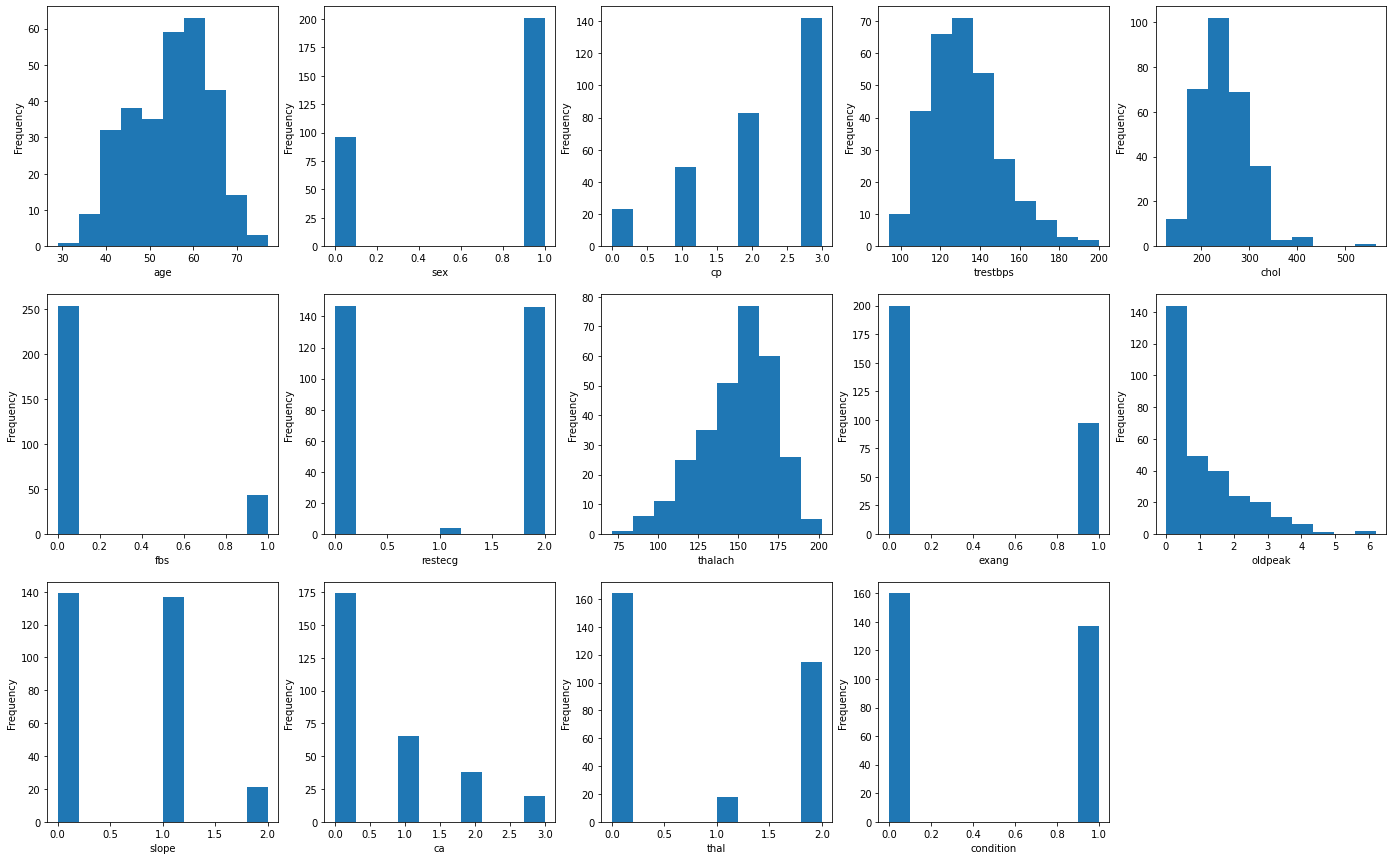

In [12]:
fig = plt.figure(figsize=(24,15))
i = 0 

for col in df:
    sub = fig.add_subplot(3,5,i + 1)
    sub.set_xlabel(col)
    df[col].plot(kind = "hist") 
    i = i + 1

## add_subplot

#  The 1st argument
represents the number of subplot rows in the figure

#  The 2nd arguement 
represents the number of subplot columns,

#  The 3rd argument 
the position of a subplot in the grid.

# Categorical Features vs. Target — Grouped Bar Chart

- 각각의 feature들이 target value에 얼마나 weigh 을 줬는지 알 수 있다. 
- groupbed bar chart is a straightforward representation.

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

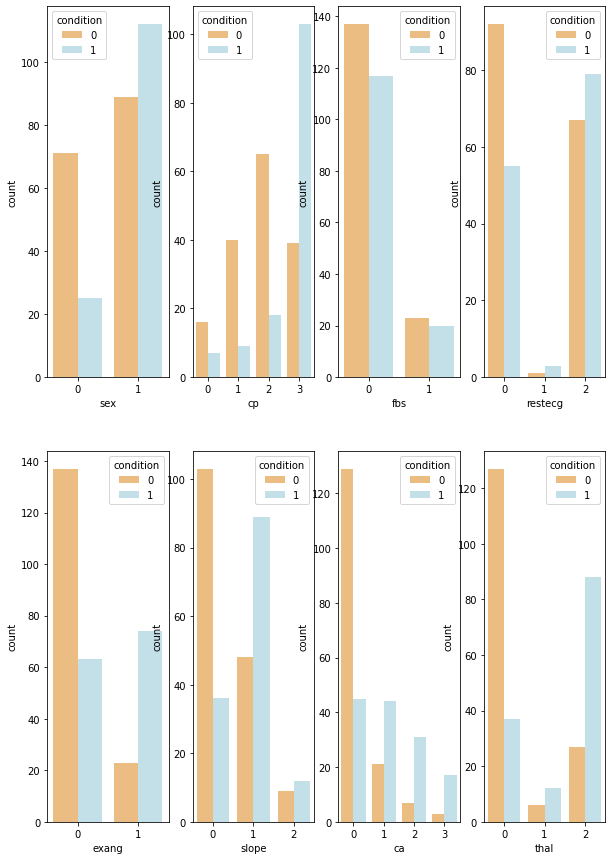

In [14]:
columns = ['sex', 'cp', 'fbs', 'restecg',
       'exang','slope', 'ca', 'thal']

fig = plt.figure(figsize = (10,15))
for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,4, i+1)
    chart = sns.countplot(data=df, x=col, hue="condition", palette = "RdYlBu")
    

## 해설
- 각각의 feature들의 x변수가 가지고 있는 0과 1들의 차이가 크면은 target value의 영향이 크다는 말이다.
- 위에서는 모든 feature들이 어느정도 영향이 있다고 볼 수 있음

# Numerical Features vs. Target — Box Plot

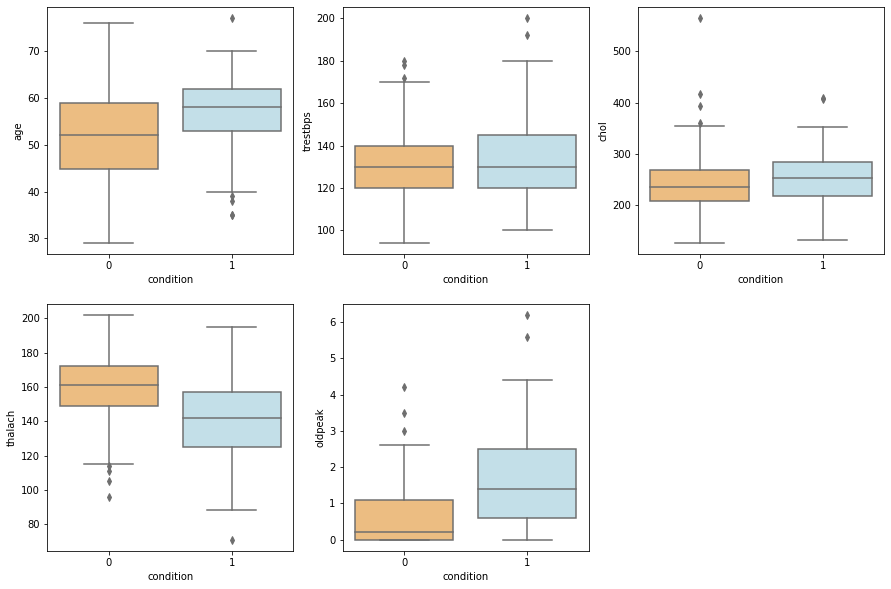

In [15]:
columns = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
fig = plt.figure(figsize = (15,10))

for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,3,i+1)
    sns.boxplot(x="condition", y=col, data=df, palette= "RdYlBu")

In [16]:
## 해설
- age, thalach, oldpeak 이 중요한 요소 - when target is 0 vs. target is 1일대 매우다름
- trestbps’ and ‘chol’ appear to be less outstanding

SyntaxError: invalid syntax (3096467232.py, line 1)

# STEP2.Split Dataset into Training and Testing Set

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [19]:
x = df.drop(["condition"],axis=1)
y = df["condition"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Step3. Model Pipeline

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

pipeline = []

pipeline.append(LogisticRegression(solver="liblinear"))
pipeline.append(SVC())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())
pipeline.append(RandomForestClassifier())
pipeline.append(GaussianNB())

In [29]:
## Note

- pipeline.append(LogisticRegression() 하면은 오류남
                  

SyntaxError: invalid syntax (1081322795.py, line 3)

# Step4. Model Evaluation

In [30]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ["LogisticRegression","SVM","KNN", "DecisionTree","Random Forest","Naive Bayes"]

acc = []
auc = []
cm = []

for model in pipeline:
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc.append(round(metrics.auc(fpr, tpr),2))
    cm.append(confusion_matrix(y_test, y_pred))
    

## Accuracy
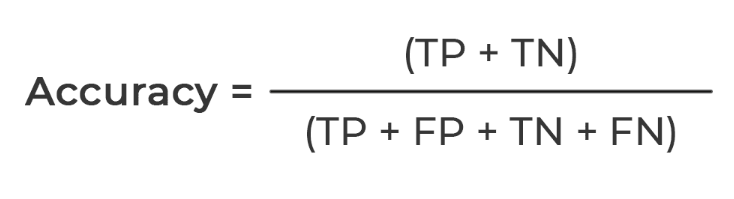
- the most straightforward indicator of the model performance


In [24]:
acc

[0.8555555555555555,
 0.5666666666666667,
 0.6555555555555556,
 0.8111111111111111,
 0.8333333333333334]

## Area Under the Curve (ACU)
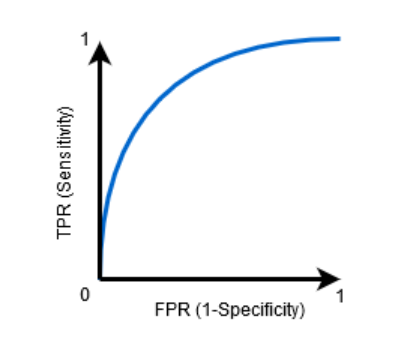
- ACU란 ROC곡선 밑의 면적을 구한 것
- ROC 곡선 - > FPR(False Positive /Negative.) 이 변할 때, 
  TPR(True Positive/positive) 이 어떻게 변하는지를 나타내는 곡선
- 1에 가까울수록 모델이 좋다는 뜻



In [32]:
auc

[0.86, 0.62, 0.68, 0.68, 0.86, 0.83]

## Confusion matrix
- actual values vs predicted value 를 summary 한 것

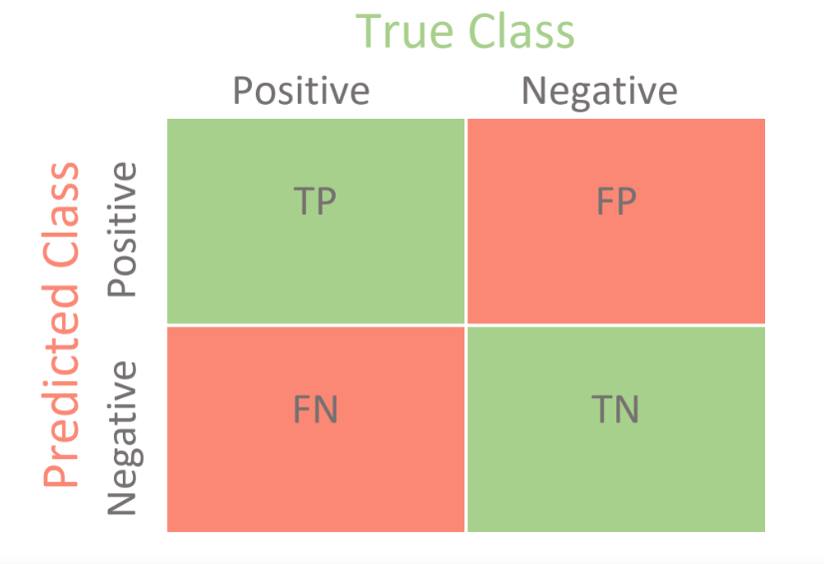

In [36]:
cm

[array([[33,  5],
        [ 8, 44]], dtype=int64),
 array([[38,  0],
        [39, 13]], dtype=int64),
 array([[31,  7],
        [24, 28]], dtype=int64),
 array([[24, 14],
        [14, 38]], dtype=int64),
 array([[34,  4],
        [ 9, 43]], dtype=int64),
 array([[30,  8],
        [ 7, 45]], dtype=int64)]

In [38]:
pd.DataFrame({"model":model_list, "Accuracy":acc, "AUC": auc})

,model,Accuracy,AUC
0,LogisticRegression,0.855556,0.86
1,SVM,0.566667,0.62
2,KNN,0.655556,0.68
3,DecisionTree,0.688889,0.68
4,Random Forest,0.855556,0.86
5,Naive Bayes,0.833333,0.83
